**Load CSV file for Dataset A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load in the data

dataframeA = pd.read_csv('5. Dataset PCA/MeterA_pca_3.csv')

dataframeA.head()

N = len(dataframeA.axes[0])

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

X = dataframeA[['PC1','PC2']]

# yLbl is Class Attruibute labels

Y = dataframeA[['Class Attruibute']]

**Split imported data into test and train set using the ratio of 0.3 and 0.7**

In [2]:
#split imported data into test and train set using the ratio of 0.3 and 0.7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

# **1. Naive Bayes**


Training Accuracy: 0.7068965517241379

Testing Accuracy: 0.68


C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


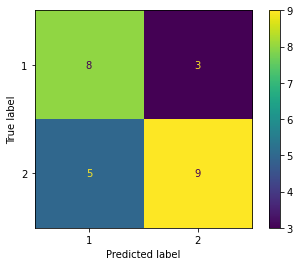

Root Mean Square Error for B:

0.565685424949238


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

clf1=GaussianNB()
clf1.fit(X_train, Y_train)
Y_predTrain = clf1.predict(X_train)
Y_predTest = clf1.predict(X_test)
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)
print("\nTraining Accuracy:",trainAcc)
print("\nTesting Accuracy:",testAcc)

#visualise the resulting for testing sets
plot_confusion_matrix(clf1, X_test, Y_test)
plt.show()

#MSE is used to evaluate model performance.
from sklearn.metrics import mean_squared_error
import math

MSE_MeterA = mean_squared_error(Y_test, Y_predTest)
 
RMSE_MeterA = math.sqrt(MSE_MeterA)
print("Root Mean Square Error for B:\n")
print(RMSE_MeterA)

# **2. K Nearest Neighbour (KNN)**

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

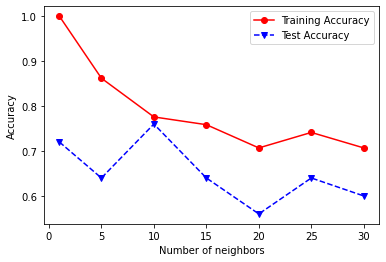

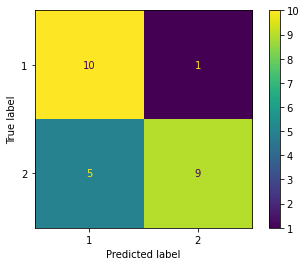

Root Mean Square Error for B:

0.4898979485566356


In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf2.fit(X_train, Y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# confusion matrix and RMSE for n_neighbors=10
clf2 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
    
#visualise the resulting for testing sets
plot_confusion_matrix(clf2, X_test, Y_test)
plt.show()

#MSE is used to evaluate model performance.
from sklearn.metrics import mean_squared_error
import math

MSE_MeterB = mean_squared_error(Y_test, Y_predTest)
 
RMSE_MeterB = math.sqrt(MSE_MeterB)
print("Root Mean Square Error for B:\n")
print(RMSE_MeterB)

# **3. Logistic Regression and Support Vector Machine**

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Text(0, 0.5, 'Accuracy')

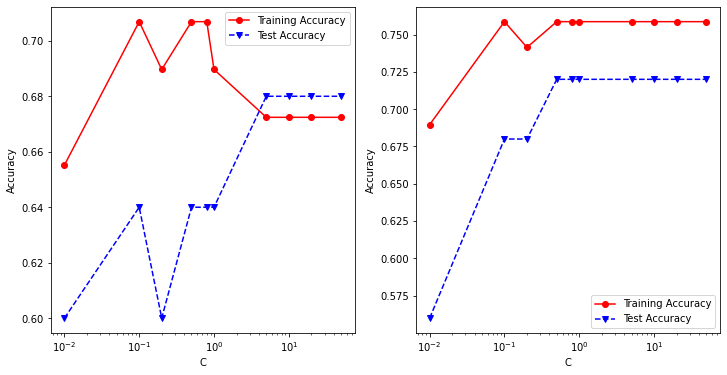

In [5]:
from sklearn import linear_model
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, Y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, Y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

# **4. Non Linear Support Vector Machine**

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Text(0, 0.5, 'Accuracy')

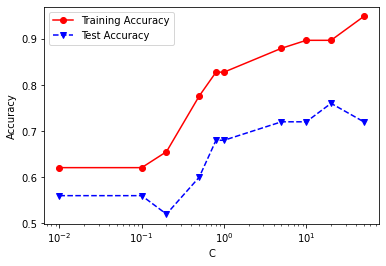

In [6]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto')
    clf5.fit(X_train, Y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

# **5. Neural Network**

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, 

Text(0, 0.5, 'Accuracy')

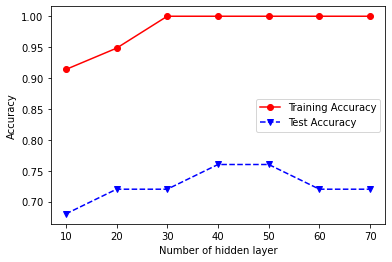

In [7]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=1,max_iter=1000)
    clf6.fit(X_train, Y_train)
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

# **6. Decision Tree**

Text(0, 0.5, 'Accuracy')

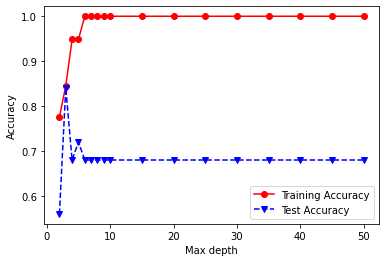

In [8]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf7 = tree.DecisionTreeClassifier(max_depth=depth)
    clf7 = clf7.fit(X_train, Y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# **7. Multi-Variate Regression**

Train accuracy for feature selection A : 0.67
Test accuracy for feature selection A : 0.68
Root Means Square Error for feature selection A : 0.32


C:\Users\joshh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


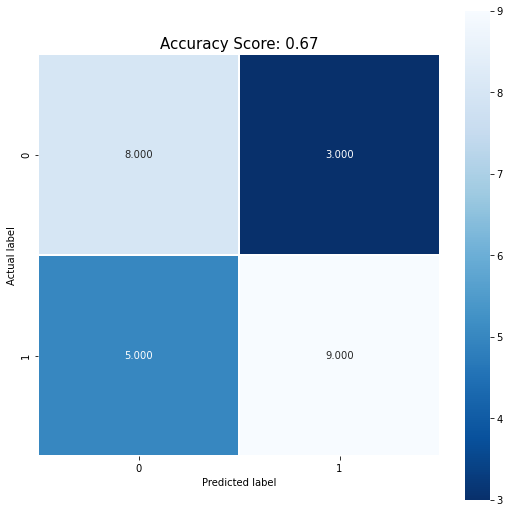

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import seaborn as sns
# define the multinomial logistic regression model
clf8 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
# fit the model on the whole dataset
clf8.fit(X_train, Y_train)

# predict the class label
y_pred=clf8.predict(X_test)

# Measure accuracy
score_train = np.round(accuracy_score(Y_train, clf8.predict(X_train)), 2)
score_test = np.round(accuracy_score(Y_test, y_pred), 2)
print("Train accuracy for Dataset A :", score_train)
print("Test accuracy for Dataset A :", score_test)

# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, y_pred)
print("Root Means Square Error for Dataset A :",rmse)

# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#plotting confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train)
plt.title(all_sample_title, size = 15);

# **8. Decision Boundary**

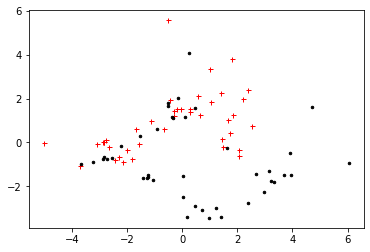

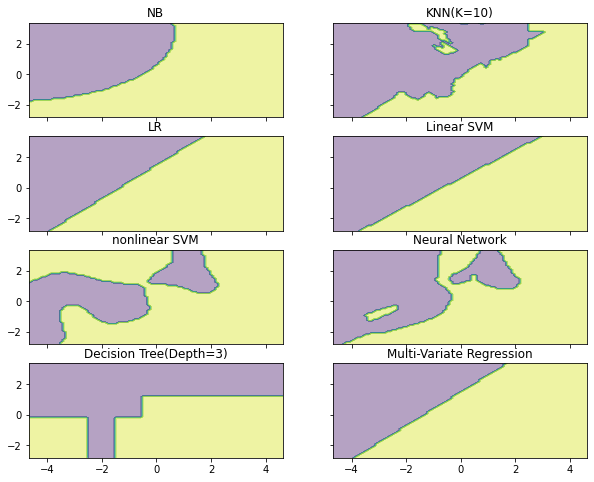

In [10]:
from sklearn.tree import DecisionTreeClassifier


clf7=DecisionTreeClassifier(max_depth=3)
clf7.fit(X_train, Y_train)

x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

plt.plot(X.iloc[:int(N/2),0],X.iloc[:int(N/2),1],'r+',X.iloc[int(N/2):,0],X.iloc[int(N/2):,1],'k.',ms=5)

f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]], [clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8],['NB','KNN(K=10)', 'LR','Linear SVM','nonlinear SVM','Neural Network','Decision Tree(Depth=3)','Multi-Variate Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()